<a href="https://colab.research.google.com/github/AlterCJ/denteeth/blob/main/Denteeth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip denteeth.zip

Archive:  denteeth.zip
   creating: denteeth/
   creating: denteeth/test/
   creating: denteeth/test/unkempt teeth/
  inflating: denteeth/test/unkempt teeth/1.jpg  
  inflating: denteeth/test/unkempt teeth/10.jpg  
  inflating: denteeth/test/unkempt teeth/11.jpg  
  inflating: denteeth/test/unkempt teeth/12.jpg  
  inflating: denteeth/test/unkempt teeth/13.jpg  
  inflating: denteeth/test/unkempt teeth/14.jpg  
  inflating: denteeth/test/unkempt teeth/15.jpg  
  inflating: denteeth/test/unkempt teeth/16.jpg  
  inflating: denteeth/test/unkempt teeth/17.jpg  
  inflating: denteeth/test/unkempt teeth/18.jpg  
  inflating: denteeth/test/unkempt teeth/19.jpg  
  inflating: denteeth/test/unkempt teeth/2.jpg  
  inflating: denteeth/test/unkempt teeth/20.jpg  
  inflating: denteeth/test/unkempt teeth/21.jpg  
  inflating: denteeth/test/unkempt teeth/22.jpg  
  inflating: denteeth/test/unkempt teeth/23.jpg  
  inflating: denteeth/test/unkempt teeth/24.jpg  
  inflating: denteeth/test/unkempt t

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "denteeth/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "denteeth/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "denteeth/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 138 files belonging to 3 classes.
Found 138 files belonging to 3 classes.
Found 138 files belonging to 3 classes.


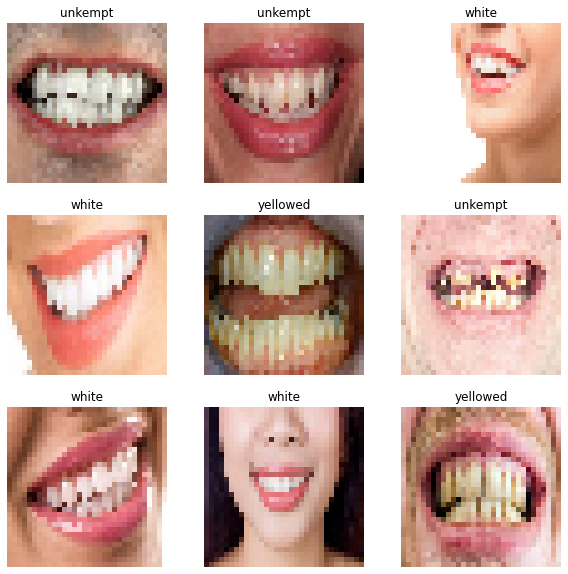

In [ ]:
class_names = ["unkempt", "white", "yellowed"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Conv2D(32, (3,3), input_shape=(150, 150, 3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')
    ]
)

In [ ]:
model.compile(
    optimizer="adam",
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
7/7 [==============================] - 3s 205ms/step - loss: 1.1154 - accuracy: 0.2391 - val_loss: 1.0869 - val_accuracy: 0.3623
Epoch 2/10
7/7 [==============================] - 2s 148ms/step - loss: 1.0833 - accuracy: 0.3623 - val_loss: 1.0757 - val_accuracy: 0.3623
Epoch 3/10
7/7 [==============================] - 2s 238ms/step - loss: 1.0694 - accuracy: 0.3623 - val_loss: 1.0522 - val_accuracy: 0.3696
Epoch 4/10
7/7 [==============================] - 2s 155ms/step - loss: 1.0576 - accuracy: 0.3623 - val_loss: 1.0261 - val_accuracy: 0.6377
Epoch 5/10
7/7 [==============================] - 2s 155ms/step - loss: 1.0045 - accuracy: 0.6667 - val_loss: 0.9886 - val_accuracy: 0.6159
Epoch 6/10
7/7 [==============================] - 2s 151ms/step - loss: 0.9672 - accuracy: 0.6014 - val_loss: 0.9532 - val_accuracy: 0.5290
Epoch 7/10
7/7 [==============================] - 2s 155ms/step - loss: 0.9304 - accuracy: 0.5507 - val_loss: 1.0014 - val_accuracy: 0.4058
Epoch 8/10
7/7 [====

In [ ]:
model.evaluate(test_ds)

7/7 [==============================] - 1s 10ms/step - loss: 0.7182 - accuracy: 0.6957


[0.7181904911994934, 0.695652186870575]

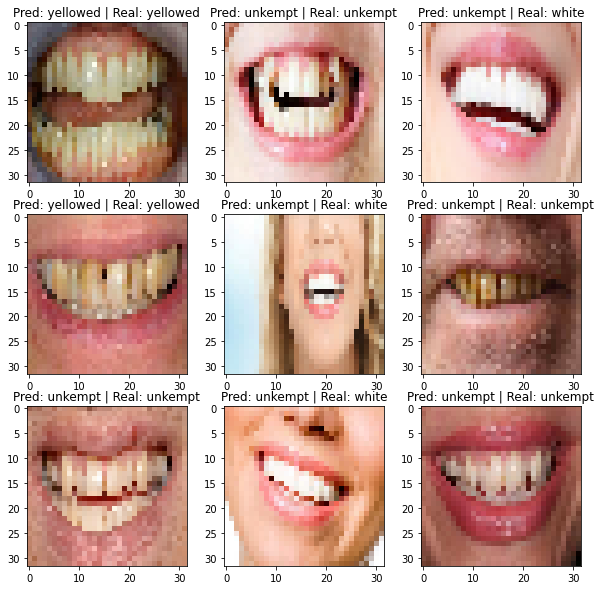

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp3301arh6/assets
